# Fake news Detection

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from sklearn.utils import shuffle

In [3]:
# reading csv files
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [111]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Inserting a column called "class" for fake and real news dataset to categories fake and true news. 

In [5]:
# adding a column class indicating the type of news

fake['class'] = 'fake'
true['class'] = 'true'


In [6]:
# dropping the columns date and title as we dont need them for our prediction

fake.drop(["date"],axis=1,inplace=True)
fake.drop(["title"],axis=1,inplace=True)

fake.head(5)

,text,subject,class
0,Donald Trump just couldn t wish all Americans ...,News,fake
1,House Intelligence Committee Chairman Devin Nu...,News,fake
2,"On Friday, it was revealed that former Milwauk...",News,fake
3,"On Christmas day, Donald Trump announced that ...",News,fake
4,Pope Francis used his annual Christmas Day mes...,News,fake


In [7]:
true.drop(["date"],axis=1,inplace=True)
true.drop(["title"],axis=1,inplace=True)

true.head(5)

,text,subject,class
0,WASHINGTON (Reuters) - The head of a conservat...,politicsNews,true
1,WASHINGTON (Reuters) - Transgender people will...,politicsNews,true
2,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,true
3,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,true
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,true


In [8]:
print(fake.shape)
print(true.shape)

(23481, 3)
(21417, 3)


In [9]:
# combining fake and true news

data = pd.concat([fake, true])
print(data.shape)

# shuffling the data and resetting the index
data = shuffle(data).reset_index(drop = True)

data.head()

(44898, 3)


,text,subject,class
0,This is how police should deal with Nazis and ...,News,fake
1,It s hard to believe that racism is still a ke...,News,fake
2,A federal judge has ordered Michigan election ...,left-news,fake
3,LONDON (Reuters) - Britain’s ambassador to the...,politicsNews,true
4,If you ve even been on Twitter then you ll kno...,News,fake


In [10]:
# removing unknowns i.e., punctuation from text
translator = str.maketrans('', '', string.punctuation)
data['text'] = data['text'].apply(lambda x: x.translate(translator))

data.head()

,text,subject,class
0,This is how police should deal with Nazis and ...,News,fake
1,It s hard to believe that racism is still a ke...,News,fake
2,A federal judge has ordered Michigan election ...,left-news,fake
3,LONDON Reuters Britain’s ambassador to the Un...,politicsNews,true
4,If you ve even been on Twitter then you ll kno...,News,fake


In [126]:
!pip install nltk

In [11]:
# removing unnecessary words(stopwords) from text
# nlkt provides tools to work on different languages
import nltk
#nltk.download('stopwords')

# importing stopwords
from nltk.corpus import stopwords

# retrieving the list of English stop words
stop = stopwords.words('english')

def remove_stopwords(text):
    words = text.lower().split()
    filtered_words = [word for word in words if word not in stop]
    return ' '.join(filtered_words)

data['text'] = data['text'].apply(remove_stopwords)

data.head()

,text,subject,class
0,police deal nazis white supremaciststhe tiki t...,News,fake
1,hard believe racism still key issue city one h...,News,fake
2,federal judge ordered michigan election offici...,left-news,fake
3,london reuters britain’s ambassador united sta...,politicsNews,true
4,even twitter know often filled news updates ev...,News,fake


In [12]:
unique_subject = data['subject'].value_counts()
print(unique_subject)
print("\nFake: ",len(fake['class']))
print("True: ",len(true['class']))

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

Fake:  23481
True:  21417


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['class'], test_size=0.2, random_state=42)

# Initialize a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform the training data into TF-IDF features
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data into TF-IDF features
tfidf_test = tfidf_vectorizer.transform(X_test)
tfidf_train

<35918x202143 sparse matrix of type '<class 'numpy.float64'>'
	with 5943590 stored elements in Compressed Sparse Row format>

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
DT = DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           random_state=42)
DT.fit(tfidf_train, y_train)
pred_dt = DT.predict(tfidf_test)
print("Train Accuracy by DecisionTreeClassifier : {}%".format(round(DT.score(tfidf_train, y_train)*100,2)))
print("Test Accuracy by DecisionTreeClassifier: {}%".format(round(DT.score(tfidf_test, y_test)*100,2)))

Train Accuracy by DecisionTreeClassifier : 100.0%
Test Accuracy by DecisionTreeClassifier: 99.71%


<Axes: >

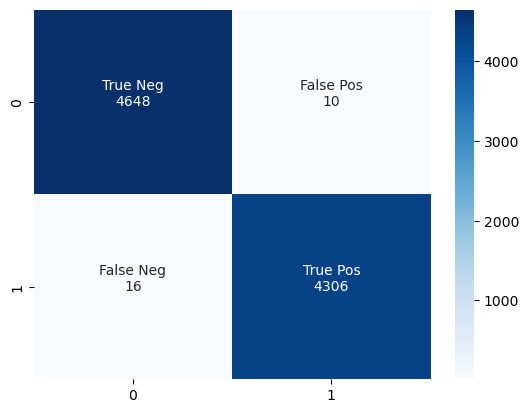

In [22]:
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(y_test, pred_dt)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')